In [66]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [67]:
# loading dataset
df = pd.read_csv('amazon_co-ecommerce_sample.csv')
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [68]:
# let's look at our dataset shape
df.shape

(10000, 17)

In [69]:
# check the null values
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [70]:
# these are the columns names
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

In [71]:
# I thought of removing these columns not necessary for hybrid recommendation system
df.drop(columns=['price','number_available_in_stock','number_of_answered_questions','product_description','customer_questions_and_answers', 'customer_reviews'],inplace=True)
df.head()

,uniq_id,product_name,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,items_customers_buy_after_viewing_this_item,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN


In [72]:
# checking again number of null values
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
number_of_reviews                                18
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
items_customers_buy_after_viewing_this_item    3065
sellers                                        3082
dtype: int64

In [73]:
# again thought of removing these columns for not using in hybrid recommendation system
df.drop(columns = ['customers_who_bought_this_item_also_bought','items_customers_buy_after_viewing_this_item','sellers'])
df.head()

,uniq_id,product_name,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,items_customers_buy_after_viewing_this_item,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN


In [74]:
# again thought of removing these columns for not using in my recommendation
df.drop(columns= ['customers_who_bought_this_item_also_bought','product_name','sellers'],inplace=True)
df.head()

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information,items_customers_buy_after_viewing_this_item
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Christmas-Holiday-Expr...
2,348f344247b0c1a935b1223072ef9d8a,ccf,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Train-With-Tracks-Batt...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...


In [75]:
# this one also thought of to be dropped
del df['items_customers_buy_after_viewing_this_item']
df.head()

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,ccf,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...
4,e33a9adeed5f36840ccc227db4682a36,Hornby,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...


In [76]:
# checking number of null values again in these columns
df.isna().sum()

uniq_id                               0
manufacturer                          7
number_of_reviews                    18
average_review_rating                18
amazon_category_and_sub_category    690
description                         651
product_information                  58
dtype: int64

In [77]:
# filtering the numerical and categorical columns
num_cols = ['number_of_reviews','average_review_rating']
cat_cols = list(set(df.columns)-set(num_cols))
cat_cols

['product_information',
 'manufacturer',
 'description',
 'uniq_id',
 'amazon_category_and_sub_category']

In [78]:
# replacing null values by 0 in the categorical columns
for col in num_cols:
    df[col].fillna(0,inplace=True)
df.isna().sum()

uniq_id                               0
manufacturer                          7
number_of_reviews                     0
average_review_rating                 0
amazon_category_and_sub_category    690
description                         651
product_information                  58
dtype: int64

In [79]:
# replacing null values by empty strings in categorical columns
for col in cat_cols:
    df[col].fillna('',inplace=True)
df.isna().sum()

uniq_id                             0
manufacturer                        0
number_of_reviews                   0
average_review_rating               0
amazon_category_and_sub_category    0
description                         0
product_information                 0
dtype: int64

In [80]:
# let's have a look again on our dataset
df.head()

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,ccf,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...
4,e33a9adeed5f36840ccc227db4682a36,Hornby,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...


In [81]:
# although we have filtered out number_of_reviews and average_review_rating as numerical columns 
#but those are still object type values
df.dtypes

uniq_id                             object
manufacturer                        object
number_of_reviews                   object
average_review_rating               object
amazon_category_and_sub_category    object
description                         object
product_information                 object
dtype: object

In [82]:
# in our dataset the number_of_review columns need to be processed as there are ',' punctuation in this column
for ind in df.index:
#     df['number_of_reviews'][ind] = int(df['number_of_reviews'][ind].replace(',',''))
    try:
        df['number_of_reviews'][ind] = int(df['number_of_reviews'][ind].replace(',',''))
    except:
        pass
df.dtypes

uniq_id                             object
manufacturer                        object
number_of_reviews                   object
average_review_rating               object
amazon_category_and_sub_category    object
description                         object
product_information                 object
dtype: object

In [83]:
# let's have a look again on our dataset
df.head()

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,ccf,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...
4,e33a9adeed5f36840ccc227db4682a36,Hornby,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...


In [84]:
# now let's process our average_review_rating column
for ind in df.index:
#     df['average_review_rating'][ind] = float(df['average_review_rating'][ind].split(' ')[0])
    try:
        df['average_review_rating'][ind] = float(df['average_review_rating'][ind].split(' ')[0])
    except:
        pass
df.dtypes

uniq_id                             object
manufacturer                        object
number_of_reviews                   object
average_review_rating               object
amazon_category_and_sub_category    object
description                         object
product_information                 object
dtype: object

In [85]:
# let's have another look on our dataset
df.head()

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,15,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,2,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,ccf,17,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,1,5,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...
4,e33a9adeed5f36840ccc227db4682a36,Hornby,3,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...


In [86]:
#changin the column type
for col in num_cols:
    df[col] = df[col].astype(float)
df.dtypes

uniq_id                              object
manufacturer                         object
number_of_reviews                   float64
average_review_rating               float64
amazon_category_and_sub_category     object
description                          object
product_information                  object
dtype: object

In [87]:
# let's see a short description of our dataset to determine the weighted rating parameters
df.describe(include='all')

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information
count,10000,10000,10000.0000,10000.000000,10000,10000,10000
unique,10000,2652,NaN,NaN,256,8515,9940
top,b15446be204fcd7802be090f6f0cf2fe,LEGO,NaN,NaN,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,,
freq,1,171,NaN,NaN,880,651,58
mean,NaN,NaN,9.1235,4.698810,NaN,NaN,NaN
std,NaN,NaN,33.7000,0.422089,NaN,NaN,NaN
min,NaN,NaN,0.0000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,1.0000,4.500000,NaN,NaN,NaN
50%,NaN,NaN,2.0000,5.000000,NaN,NaN,NaN
75%,NaN,NaN,6.0000,5.000000,NaN,NaN,NaN


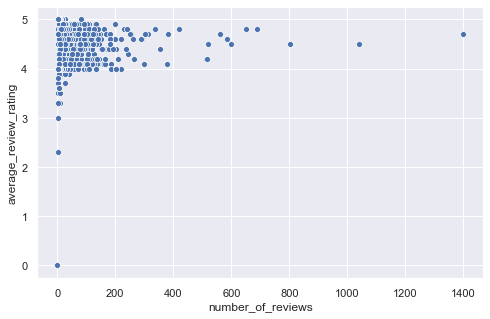

In [88]:
# here we can see number of reviews is highly connected with average review ratings
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.figure(figsize=(8,5))

plot = sns.scatterplot(x=df["number_of_reviews"],
                       y=df["average_review_rating"])

In [89]:
# let's determine weighted rating parameters
df['weighted_rating'] = 0
minimum_num_of_ratings = 9
mean_vote = 4.6
df.head()

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information,weighted_rating
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,15.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,0
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,2.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,0
2,348f344247b0c1a935b1223072ef9d8a,ccf,17.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,0
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,1.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,0
4,e33a9adeed5f36840ccc227db4682a36,Hornby,3.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,0


In [90]:
# calculating the weighted_rating
for ind in df.index:
#     df['weighted_rating'][ind] = ((df['average_review_rating'][ind] * df['number_of_reviews'][ind])+(mean_vote*minimum_num_of_ratings))/(df['average_review_rating'][ind] + df['number_of_reviews'][ind])
#     print(df['weighted_rating'][ind])
    try:
         df['weighted_rating'][ind] = ((df['average_review_rating'][ind] * df['number_of_reviews'][ind])+(mean_vote*minimum_num_of_ratings))/(df['average_review_rating'][ind] + df['number_of_reviews'][ind])
    except:
        df['weighted_rating'][ind] = 1
df.head()

,uniq_id,manufacturer,number_of_reviews,average_review_rating,amazon_category_and_sub_category,description,product_information,weighted_rating
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,15.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,5
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,2.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,7
2,348f344247b0c1a935b1223072ef9d8a,ccf,17.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,5
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,1.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,7
4,e33a9adeed5f36840ccc227db4682a36,Hornby,3.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,7


In [91]:
# let's look on the description of our dataset again
df.describe()

,number_of_reviews,average_review_rating,weighted_rating
count,10000.0000,10000.000000,10000.000000
mean,9.1235,4.698810,6.613600
std,33.7000,0.422089,1.151012
min,0.0000,0.000000,1.000000
25%,1.0000,4.500000,6.000000
50%,2.0000,5.000000,7.000000
75%,6.0000,5.000000,7.000000
max,1399.0000,5.000000,9.000000


In [92]:
# as we have calculated weighted rating so these two columns are no longer needed
df.drop(columns = ['number_of_reviews','average_review_rating'],inplace=True)
df.head()

,uniq_id,manufacturer,amazon_category_and_sub_category,description,product_information,weighted_rating
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,5
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,7
2,348f344247b0c1a935b1223072ef9d8a,ccf,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,5
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,7
4,e33a9adeed5f36840ccc227db4682a36,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,7


In [93]:
# let's check up the category to determine what to process in the string
df['amazon_category_and_sub_category'][0]

'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains'

In [94]:
# I have thought of deleting the description too
del df['description']
df.head()

,uniq_id,manufacturer,amazon_category_and_sub_category,product_information,weighted_rating
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,5
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,7
2,348f344247b0c1a935b1223072ef9d8a,ccf,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,5
3,e12b92dbb8eaee78b22965d2a9bbbd9f,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight259 g Product Dim...,7
4,e33a9adeed5f36840ccc227db4682a36,Hornby,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight159 g Product Dim...,7


In [95]:
# so now the shape is 10000,5 from 10000, 17
df.shape

(10000, 5)

In [96]:
# processing the category column strings
for ind in df.index:
    df['amazon_category_and_sub_category'][ind] = df['amazon_category_and_sub_category'][ind].replace('>','')


In [97]:
# looks like all good in the category column
df['amazon_category_and_sub_category'][0]

'Hobbies  Model Trains & Railway Sets  Rail Vehicles  Trains'

In [98]:
# now let's have a look on our product information to see what we need to process
df['product_information'][0]

'Technical Details Item Weight640 g Product Dimensions29.6 x 20.8 x 1 cm Manufacturer recommended age:6 years and up Item model numberR8148 Main Language(s)English manual, English Number of Game Players1 Number of Puzzle Pieces1 Assembly RequiredNo Scale1:72 Engine Typeelectric Track Width/GaugeHO Batteries Required?No Batteries Included?No Material Type(s)Paper Material Care InstructionsNo Remote Control Included?No Radio Control Suitabilityindoor Colorwhite \xa0\xa0 Additional Information ASINB00HJ208KO Best Sellers Rank 52,854 in Toys & Games (See top 100) #69 in\xa0Toys & Games > Model Trains & Railway Sets > Rail Vehicles > Trains Shipping Weight640 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available24 Dec. 2013 \xa0\xa0 Feedback \xa0Would you like to update product info or give feedback on images?'

In [99]:
# I have thought of processing all the strings together. So joined all of them to product details column and dropped the used 
# columns
df['product_details'] = df['product_information'] + ' ' + df['manufacturer'] + ' ' + df['amazon_category_and_sub_category']
df.drop(columns = ['product_information', 'manufacturer', 'amazon_category_and_sub_category'],inplace=True)
df.head()

,uniq_id,weighted_rating,product_details
0,eac7efa5dbd3d667f26eb3d3ab504464,5,Technical Details Item Weight640 g Product Dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,7,Technical Details Manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,5,Technical Details Manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,7,Technical Details Item Weight259 g Product Dim...
4,e33a9adeed5f36840ccc227db4682a36,7,Technical Details Item Weight159 g Product Dim...


In [100]:
df['product_details'] = df['product_details'].str.lower()
df.head()

,uniq_id,weighted_rating,product_details
0,eac7efa5dbd3d667f26eb3d3ab504464,5,technical details item weight640 g product dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,7,technical details manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,5,technical details manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,7,technical details item weight259 g product dim...
4,e33a9adeed5f36840ccc227db4682a36,7,technical details item weight159 g product dim...


In [101]:
# so our ultimate dataset shape is 10000,3 from 10000, 17!
df.shape

(10000, 3)

In [102]:
# importing natural language processing libraries to process strings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [103]:
# removing the stop words from the dataset
stop_words = set(stopwords.words('english'))  
for ind in df.index:
    example_sent = df['product_details'][ind]
    word_tokens = word_tokenize(example_sent)  

    filtered_sentence = [w for w in word_tokens if not w in stop_words]  

    filtered_sentence = []  

    for w in word_tokens:  
        if w not in stop_words:  
            filtered_sentence.append(w)
    df['product_details'][ind] = ' '.join(filtered_sentence)
df.head()

,uniq_id,weighted_rating,product_details
0,eac7efa5dbd3d667f26eb3d3ab504464,5,technical details item weight640 g product dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,7,technical details manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,5,technical details manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,7,technical details item weight259 g product dim...
4,e33a9adeed5f36840ccc227db4682a36,7,technical details item weight159 g product dim...


In [104]:
# define punctuation
# removing the punctuations in the strings
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for ind in df.index:
    
    my_str = df['product_details'][ind]
    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
       if char not in punctuations:
           no_punct = no_punct + char

    df['product_details'][ind] = no_punct
df.head()

,uniq_id,weighted_rating,product_details
0,eac7efa5dbd3d667f26eb3d3ab504464,5,technical details item weight640 g product dim...
1,b17540ef7e86e461d37f3ae58b7b72ac,7,technical details manufacturer recommended age...
2,348f344247b0c1a935b1223072ef9d8a,5,technical details manufacturer recommended age...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,7,technical details item weight259 g product dim...
4,e33a9adeed5f36840ccc227db4682a36,7,technical details item weight159 g product dim...


In [105]:
# looks all good
df['product_details'][0]

'technical details item weight640 g product dimensions296 x 208 x 1 cm manufacturer recommended age6 years item model numberr8148 main language   english manual  english number game players1 number puzzle pieces1 assembly requiredno scale172 engine typeelectric track widthgaugeho batteries required  batteries included  material type   paper material care instructionsno remote control included  radio control suitabilityindoor colorwhite additional information asinb00hj208ko best sellers rank 52854 toys  games  see top 100   69 toys  games  model trains  railway sets  rail vehicles  trains shipping weight640 g delivery destinations  visit delivery destinations help page see item delivered  date first available24 dec 2013 feedback would like update product info give feedback images  hornby hobbies model trains  railway sets rail vehicles trains'

In [106]:
# so we are going to make a vector of words to make word to word n_gram and calculate cosine similarities
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [107]:
# making the matrix
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['product_details'])

In [108]:
# calculating the cosine_similarities
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [109]:
# here we are multipling the weighted rating of every of product with their cosine similarities
# so that both of the recommendation have an impact 
for x in range(len(cosine_similarities)):
    cosine_similarities[x] = cosine_similarities[x]*df['weighted_rating']/9*100

In [110]:
# calculating the results for recommending
results = {}

for idx, row in df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df['uniq_id'][i]) for i in similar_indices]

    results[row['uniq_id']] = similar_items[1:]
    
print('done!')

done!


In [111]:
# defining a function to recommend items
def item(id):
    return df.loc[df['uniq_id'] == id]['product_details'].tolist()[0].split(' - ')[0]

In [112]:
# Just reads the results out of the dictionary.
res = []
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id)[:150] + "...")
    print("-------")
    recs = results[item_id][:num]
#     print(recs)
    for rec in recs:
        res.append(rec)
        print("Recommended: " + item(rec[1])[:150] + " (score:" + str(round(rec[0] ,2)) + ")"[:150])

recommend(item_id='eac7efa5dbd3d667f26eb3d3ab504464', num=5)

Recommending 5 products similar to technical details item weight640 g product dimensions296 x 208 x 1 cm manufacturer recommended age6 years item model numberr8148 main language   engli...
-------
Recommended: technical details manufacturer recommended age10 years manufacturer referencec102a scale176 track widthgaugeoo additional information asinb00h2hivfu b (score:29.48)
Recommended: technical details item weight540 g product dimensions368 x 116 x 64 cm manufacturer recommended age8 years item model numberr3305 main language   engl (score:27.65)
Recommended: technical details item weight200 g product dimensions362 x 76 x 42 cm manufacturer recommended age3 years item model numberr4350 scale176 track widthg (score:27.62)
Recommended: technical details manufacturer recommended age14 years manufacturer reference39502 scale1  76 track widthgaugeoo additional information asinb004updiby (score:27.51)
Recommended: technical details item weight599 g product dimensions36 x 102 x 6 cm manufactu

There were 18 items without any rating. So if we had gone for only rating based recommendation system we would never have those 18 items to be recommended. Hence it's partially solving cold start problem with a good recommendation score.

In [121]:

for k in sorted(results, key=lambda k: len(results[k])):
    print(len(results[k]))
    break

98
